In [1]:
!pip install git+https://github.com/FloresArturo/soonermesopy

  Cloning https://github.com/FloresArturo/soonermesopy to /tmp/pip-req-build-rcrmk7ml
  Running command git clone --filter=blob:none --quiet https://github.com/FloresArturo/soonermesopy /tmp/pip-req-build-rcrmk7ml
  Resolved https://github.com/FloresArturo/soonermesopy to commit efb3825183505159f995df694fa543046d7aa8d9
  Preparing metadata (setup.py) ... done
  Created wheel for soonermesopy: filename=soonermesopy-0.1.0-py3-none-any.whl size=39750 sha256=7f06eb44c425a06fac1a9bae8fd6575ce6af687f8e84776deee9b4ae11a0763b
  Stored in directory: /tmp/pip-ephem-wheel-cache-mxjjvmkr/wheels/cb/e4/a9/a738bf32e90fd33be49f338afd3f18489e87cd27f0cc3de9a1
Successfully built soonermesopy


#Tutorial to using *soonermesopy*

## Intro

*soonermesopy* is a Python package to facilitate downloading data from the Oklahoma Mesonet network. The ```pandas``` library is used to download and manipulate data as DataFrames.

Use the following to install from:
- Terminal
```cmd
pip install git+https://github.com/FloresArturo/soonermesopy
```
- Google Colab
```cmd
!pip install git+https://github.com/FloresArturo/soonermesopy
```

The available functions include:
- generate_date()
- retrieve_geoinfo()
- retrieve_hydraulic_params()
- retrieve_daily_summary()
- retrieve_monthly_summary()

In [14]:
# after installing, load it (and pandas)
from soonermesopy import *
import pandas as pd

## Stations' geographic information

It is possible to retrieve the location and soil texture from all stations. To do so, we use:

In [16]:
# To load all of the stations information
geoinfo = retrieve_geoinfo()
geoinfo.head()

,stnm,stid,name,city,cnty,nlat,elon,elev,TEXT5,TEXT10,TEXT25,TEXT60,TEXT75
0,110,ACME,Acme,Rush Springs,Grady,34.80833,-98.02325,397,Sandy Loam,NaN,Sandy Loam,Sandy Clay Loam,Sandy Clay Loam
1,1,ADAX,Ada,Ada,Pontotoc,34.79851,-96.66909,295,Sandy Loam,NaN,Sandy Clay Loam,Sandy Clay Loam,Clay Loam
2,2,ALTU,Altus,Altus,Jackson,34.58722,-99.33808,416,Clay Loam,NaN,Silty Clay Loam,Silty Clay,Silty Clay
3,116,ALV2,Alva,Alva,Woods,36.70823,-98.70974,439,Clay Loam,NaN,Clay,Clay,-999
4,3,ALVA,Alva,Alva,Woods,36.77970,-98.67170,450,-999,-999,-999,-999,-999


In [17]:
# To load only one station
  # use 4 letter ID for the station
geoinfo = retrieve_geoinfo(station_id='ADAX')
geoinfo

,stnm,stid,name,city,cnty,nlat,elon,elev,TEXT5,TEXT10,TEXT25,TEXT60,TEXT75
1,1,ADAX,Ada,Ada,Pontotoc,34.79851,-96.66909,295,Sandy Loam,NaN,Sandy Clay Loam,Sandy Clay Loam,Clay Loam


EXTRA: plot the stations

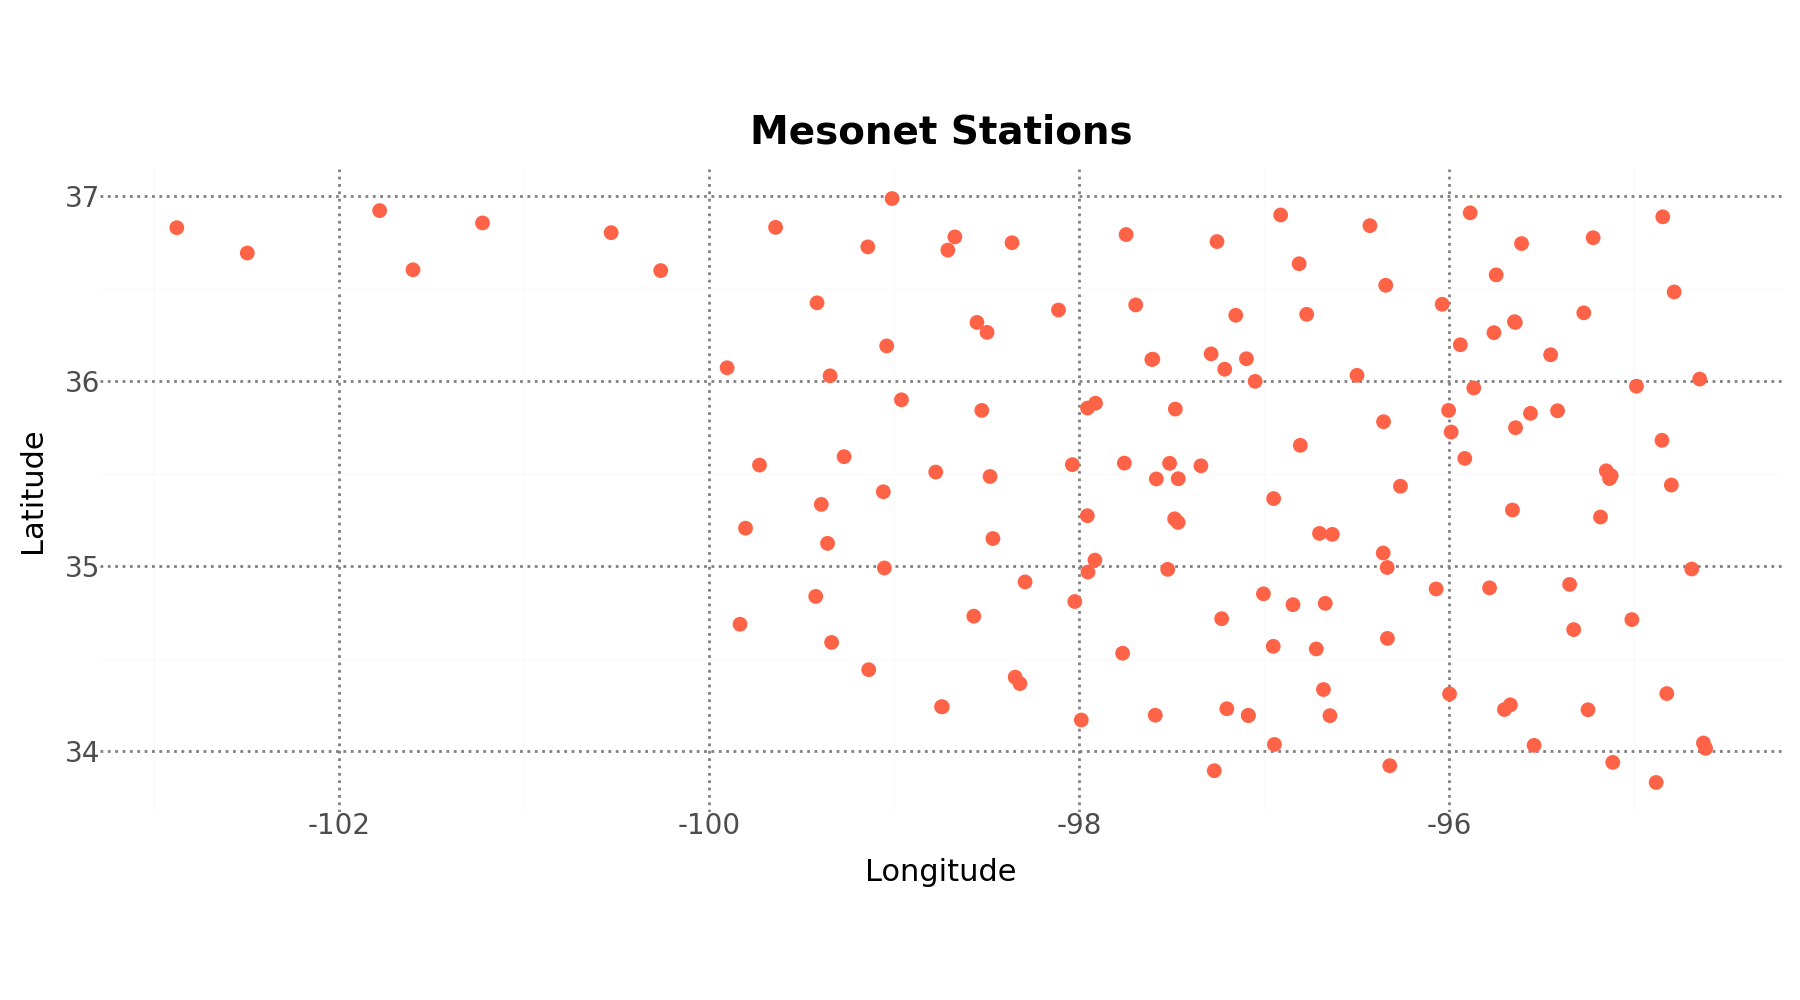

In [18]:
# 1 import libraries
from plotnine import *

# 2 load stations data
geoinfo = retrieve_geoinfo()

# 3 create plot
(
    ggplot(geoinfo) +
    geom_point(aes(x='elon', y='nlat'), color='tomato', size=2)+
    coord_fixed()+
    theme_minimal() +
    labs(title='Mesonet Stations',
         x='Longitude',
         y='Latitude') +
    theme(
        figure_size=(9,5),
        panel_grid_major=element_line(color='gray', linetype='dotted'),
        axis_text=element_text(size=10),
        plot_title=element_text(size=14, weight='bold')
    )
)

## Climatic data

You can download daily or monthly data for a single station or for all stations. The available set of variables include:
- 'weather'         = temperature, humidity, precipitation, radiation, wind speed
- 'soil_moist'      = FC, WP, WHC, VWC, FAW, MP and Ks at 05, 25, and 60 cm
- 'soil_temp'       = temperatures under bare soil and native vegetation
- 'all'             = all available variables

### Daily data
Downloads data for the indicated variables for a single or all stations. Function:
- retrieve_daily_summary(station_id, date, variables)
  - station_id: four letter ID for the station of interest (if not given, by default it downloads all stations)
  - date: date object for the day of interest (if not given, by default it is yesterday)
  - variables: variables of interest, see above (if not given, by default it includes all available variables)

In [3]:
# when no input is given to the function (default all variables for all stations for yesterday)
d1 = retrieve_daily_summary()
d1.head()

,Site,FC05,FC25,FC60,WP05,WP25,WP60,WHC05,WHC25,WHC60,...,TMAX,TMIN,TAVG,HMAX,HMIN,HAVG,RAIN,ATOT,WSPD,Date
0,ACME,0.142,0.196,0.214,0.041,0.090,0.129,0.101,0.106,0.085,...,92.08,73.98,82.19,82.00,47.12,66.34,0.0,23.11,12.21,2025-07-11
1,ADAX,0.196,0.260,0.301,0.088,0.147,0.181,0.108,0.113,0.120,...,91.87,77.47,83.56,79.69,47.43,63.48,0.0,26.60,7.17,2025-07-11
2,ALTU,0.304,0.334,0.356,0.170,0.200,0.244,0.134,0.134,0.112,...,93.24,75.34,83.54,76.13,41.10,60.18,0.0,21.89,10.46,2025-07-11
3,ALV2,0.330,0.331,0.321,0.161,0.197,0.228,0.169,0.134,0.093,...,96.53,75.00,84.91,80.64,34.79,56.36,0.0,24.06,8.28,2025-07-11
4,ANT2,0.238,0.149,0.235,0.053,0.085,0.131,0.185,0.064,0.104,...,91.94,70.81,81.81,97.91,49.03,72.67,0.0,26.23,4.78,2025-07-11


In [4]:
# Given station, given day, only soil moisture data
station_of_interest     = 'ADAX'
date_of_interest        = generate_date(2025,1,1)
variables_of_interest   = 'soil_moist'

d2 = retrieve_daily_summary(station_id=station_of_interest,
                            date=date_of_interest,
                            variables=variables_of_interest)
d2.transpose()

,1
Site,ADAX
FC05,0.196
FC25,0.26
FC60,0.301
WP05,0.088
WP25,0.147
WP60,0.181
WHC05,0.108
WHC25,0.113
WHC60,0.12


### Monthly data

It is also possible to download monthly data for a station. Function:
- retrieve_monthly_summary(station_id, month, year, variables)
  - station_id: four letter id for the station of interest (mandatory)
  - month, year: date of interest (if not given, data for current month until yesterday)
  - variables: variables of interest, see above (if not given, all available are included)

In [5]:
# example 1
m1 = retrieve_monthly_summary()
m1

Retrieving 7/2025 ... : 100%|██████████| 11/11 [00:21<00:00,  1.92s/it]


,Site,FC05,FC25,FC60,WP05,WP25,WP60,WHC05,WHC25,WHC60,...,TMAX,TMIN,TAVG,HMAX,HMIN,HAVG,RAIN,ATOT,WSPD,Date
0,ACME,0.142,0.196,0.214,0.041,0.090,0.129,0.101,0.106,0.085,...,86.76,68.54,77.20,98.35,53.86,80.64,0.01,20.27,4.12,2025-07-01
1,ADAX,0.196,0.260,0.301,0.088,0.147,0.181,0.108,0.113,0.120,...,87.73,69.28,76.89,98.47,53.74,81.78,0.00,24.69,2.55,2025-07-01
2,ALTU,0.304,0.334,0.356,0.170,0.200,0.244,0.134,0.134,0.112,...,85.01,70.43,77.45,92.23,56.20,74.60,0.00,13.21,5.06,2025-07-01
3,ALV2,0.330,0.331,0.321,0.161,0.197,0.228,0.169,0.134,0.093,...,86.36,65.10,76.34,97.51,49.22,73.19,0.00,20.09,4.35,2025-07-01
4,ANT2,0.238,0.149,0.235,0.053,0.085,0.131,0.185,0.064,0.104,...,91.24,69.73,78.98,96.18,45.08,74.91,0.00,26.19,3.03,2025-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,WILB,0.280,0.282,0.369,0.083,0.108,0.251,0.197,0.174,0.118,...,92.14,77.59,84.08,80.38,45.75,64.52,0.00,26.06,8.19,2025-07-11
113,WIST,0.323,0.270,0.421,0.115,0.126,0.283,0.208,0.144,0.138,...,91.42,71.35,81.56,99.34,49.94,74.50,0.00,25.95,NaN,2025-07-11
114,WOOD,0.226,0.213,0.159,0.096,0.088,0.079,0.130,0.125,0.080,...,93.90,74.52,82.59,72.56,34.07,57.19,0.00,18.80,9.21,2025-07-11
115,WYNO,0.335,0.327,0.369,0.152,0.201,0.184,0.183,0.126,0.185,...,91.92,76.14,83.03,85.26,56.34,69.88,0.00,23.85,11.48,2025-07-11


In [15]:
# example 2
# an annual summary for a given station of soil moisture
station_of_interest     = 'CENT'
variables_of_interest   = 'soil_moist'
year_of_interest        = 2014

data = pd.DataFrame()
for i in range(1,13):
  m = retrieve_monthly_summary(station_id   = station_of_interest,
                               month        = i,
                               year         = year_of_interest,
                               variables    = variables_of_interest)
  data = pd.concat([data, m])

data

Retrieving 12/2014 ... : 100%|██████████| 31/31 [00:31<00:00,  1.00s/it]


,Site,FC05,FC25,FC60,WP05,WP25,WP60,WHC05,WHC25,WHC60,...,FAW05,FAW25,FAW60,MP05,MP25,MP60,Ks05,Ks25,Ks60,Date
24,CENT,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,0.168,...,1.550121,1.928045,1.029565,-9.746172,-10.076593,-12.306638,19.4,30.7,1.8,2014-01-01
24,CENT,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,0.168,...,1.560129,1.909376,1.017560,-9.426536,-10.418159,-13.599246,19.4,30.7,1.8,2014-01-02
24,CENT,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,0.168,...,1.539901,1.890604,1.008933,-10.076593,-10.771244,-14.535037,19.4,30.7,1.8,2014-01-03
24,CENT,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,0.168,...,1.550121,1.909376,0.999794,-9.746172,-10.418159,-15.534737,19.4,30.7,1.8,2014-01-04
24,CENT,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,0.168,...,1.550121,1.928045,1.004428,-9.746172,-10.076593,-15.026636,19.4,30.7,1.8,2014-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,CENT,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,0.168,...,1.598004,1.928045,1.036969,-8.249037,-10.076593,-11.513517,19.4,30.7,1.8,2014-12-27
24,CENT,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,0.168,...,1.579502,1.946601,1.017560,-8.818238,-9.746172,-13.599246,19.4,30.7,1.8,2014-12-28
24,CENT,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,0.168,...,1.588862,1.965033,1.017560,-8.528909,-9.426536,-13.599246,19.4,30.7,1.8,2014-12-29
24,CENT,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,0.168,...,1.588862,1.928045,1.017560,-8.528909,-10.076593,-13.599246,19.4,30.7,1.8,2014-12-30
